In [375]:
import pandas as pd #for handling csv and csv contents
from rdflib import Graph, Literal, RDF,RDFS, URIRef, Namespace #basic RDF handling
from rdflib.namespace import FOAF , XSD #most common namespaces
import urllib.parse #for parsing strings to URI's

import math
import numpy as np

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

#### defining URIs

In [376]:
uri = Namespace('http://exampleDb.org/')

In [377]:
#classes
Paper = uri['Paper']

#subclasses of paper
poster = uri['poster']
shortPaper = uri['shortPaper']
fullPaper = uri['fullPaper']
demoPaper = uri['demoPaper']
#class 
Publication = uri['Publication']
review = uri['review']

#class
Person = uri['Person']

#subclasses of person
reviewer = uri['reviewer']
chair = uri['chair']
editor = uri['editor']
author = uri['author']

#class 
area = uri['area']

#subclasses of area
ml = uri['ml']
db = uri['db']
nlp = uri['nlp']

#class 
venue = uri['venue']

#subclasses of venue
journal = uri['journal']
conference = uri['conference']

##subclasses of conference
workshops = uri['workshops']
symposiums = uri['symposiums']
expertGrou = uri['expertGroups']
regularConferences = uri['regularConferences']

#properties 

#paper acceptedfor publication 
accepted = uri['acceptedfor']
#relatedArea
relatedto = uri['relatedto']
#paper submittedIn
submittedIn = uri['submittedIn']
#author wrote paper
wrote = uri['wrote']
#reviewer Submitted review
R_submitted = uri['submitted']
#review about paper
r_about = uri['reviewAbout']



###########
#venue name
vname = uri["venueName"]

# paper name
pname =  uri["paperName"]

# person name
person_name = uri["personName"]

# area name
a_name = uri["areaName"]

# publication name and year
pub_name = uri["publicationName"]
pub_year = uri["year"]

#review decision and comments
r_decision = uri["decision"]
r_comments = uri["comments"]

# chair handles 
chandles = uri["handledByC"]
# editor handles
ehandles = uri["handledByE"]

In [378]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

In [379]:
g = Graph()
g.parse("tbox-Seif_Amjid.ttl")

<Graph identifier=N1b9b11324a5841f6b1a7fb7a8081bd7f (<class 'rdflib.graph.Graph'>)>


(dot.exe:12224): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:12224): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.



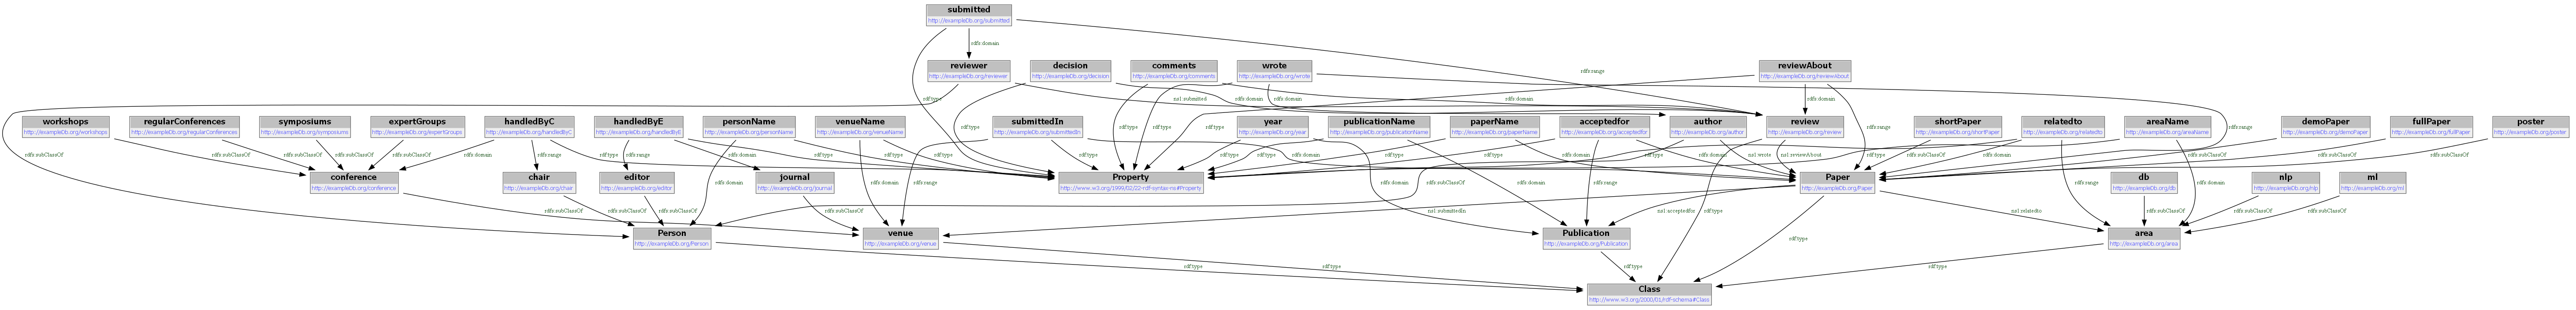

In [380]:
visualize(g)

# Abox

## Person

In [381]:
url='processed_data/'
# we divided person's data into 4 subclasses  
auth_sixty= pd.read_csv(url+"authors.csv",sep=",")  # authors
review_twenty = pd.read_csv(url+"reviewers.csv",sep=",") #reviewers 
chair_ten= pd.read_csv(url+"chairs.csv",sep=",")   #chairs 
editor_ten= pd.read_csv(url+"editors.csv",sep=",")  # editors

In [382]:
for index, row in auth_sixty.iterrows():
    g.add((author+"/"+str(row['ID']),RDF.type,author) ) #connecting instance with tbox
    g.add((author+"/"+str(row['ID']),person_name, Literal(row['name'], datatype=XSD.string)) )  #connecting person node with person name
    
for index, row in review_twenty.iterrows():
    g.add((reviewer+"/"+str(row['ID']),RDF.type,reviewer) )  #connecting instance with tbox
    g.add((reviewer+"/"+str(row['ID']),person_name, Literal(row['name'], datatype=XSD.string)) )

for index, row in chair_ten.iterrows():
    g.add((chair+"/"+str(row['ID']),RDF.type,chair) )  #connecting instance with tbox
    g.add((chair+"/"+str(row['ID']),person_name, Literal(row['name'], datatype=XSD.string)) )

for index, row in editor_ten.iterrows():
    g.add((editor+"/"+str(row['ID']),RDF.type,editor) )  #connecting instance with tbox
    g.add((editor+"/"+str(row['ID']),person_name, Literal(row['name'], datatype=XSD.string)) )

In [383]:
editor+"/"+str(row['ID'])

rdflib.term.URIRef('http://exampleDb.org/editor/35854537900')

## articles with names

In [384]:
Name_articles = pd.read_csv(url+"articles.csv",sep =",")

In [385]:
# articles types
for index, row in Name_articles[Name_articles['Papertype'] == 'fullPaper'].iterrows():
    g.add((fullPaper+"/"+str(row['ID']),RDF.type,fullPaper) )
    g.add((fullPaper+"/"+str(row['ID']),pname, Literal(row['title'], datatype=XSD.string)) )
  
    

for index, row in Name_articles[Name_articles['Papertype'] == 'demoPaper'].iterrows():
    g.add((demoPaper+"/"+str(row['ID']),RDF.type,demoPaper) )
    g.add((demoPaper+"/"+str(row['ID']),pname, Literal(row['title'], datatype=XSD.string)) )


for index, row in Name_articles[Name_articles['Papertype'] == 'shortPaper'].iterrows():
    g.add((shortPaper+"/"+str(row['ID']),RDF.type,shortPaper) )
    g.add((shortPaper+"/"+str(row['ID']),pname, Literal(row['title'], datatype=XSD.string)) )
    

for index, row in Name_articles[Name_articles['Papertype'] == 'Poster'].iterrows():
    g.add((poster+"/"+str(row['ID']),RDF.type,poster) )
    g.add((poster+"/"+str(row['ID']),pname, Literal(row['title'], datatype=XSD.string)) )
   
    

## articles written by author

In [386]:
auth_art = pd.read_csv(url+"articles_written_by_author.csv",sep=",")

In [387]:
NArt = pd.merge(auth_art, Name_articles, how='left', left_on='article_ID', right_on='ID')

In [388]:
NArt.drop(['ID_y','volume','DOI'],axis=1,inplace =True)


In [389]:
NArt

,ID_x,name,article_ID,title,Papertype
0,57218202833,Gautam A.,1,Self-assessment of Proficiency of Intelligent ...,fullPaper
1,7004904337,Crandall J.W.,1,Self-assessment of Proficiency of Intelligent ...,fullPaper
2,7004904337,Crandall J.W.,156,Moderating operator influence in human-swarm s...,fullPaper
3,7004904337,Crandall J.W.,298,Cooperating in long-term relationships with ti...,demoPaper
4,7004904337,Crandall J.W.,626,Information design in crowdfunding under thres...,shortPaper
...,...,...,...,...,...
2874,56701050600,Reynolds P.R.,799,Re-epithelialization of whole porcine kidneys ...,poster
2875,57203184524,Cramer J.,444,Effect of strain path on forming limits and re...,shortPaper
2876,57201465968,Adams D.,444,Effect of strain path on forming limits and re...,shortPaper
2877,56248395300,Brown T.,444,Effect of strain path on forming limits and re...,shortPaper


In [390]:
# author wrote article

for index, row in NArt[NArt['Papertype'] == 'fullPaper'].iterrows():
    g.add((author+"/"+str(row['ID_x']),wrote,fullPaper+"/"+str(row['article_ID'])))
    

for index, row in NArt[NArt['Papertype'] == 'demoPaper'].iterrows():
    g.add((author+"/"+str(row['ID_x']),wrote,fullPaper+"/"+str(row['article_ID'])))


for index, row in NArt[NArt['Papertype'] == 'shortPaper'].iterrows():
    g.add((author+"/"+str(row['ID_x']),wrote,fullPaper+"/"+str(row['article_ID'])))
    

for index, row in NArt[NArt['Papertype'] == 'Poster'].iterrows():
    g.add((author+"/"+str(row['ID_x']),wrote,fullPaper+"/"+str(row['article_ID'])))
   
    

    

## Publication

### PublishedIn

In [391]:
publishedIn = pd.read_csv(url+"article_published_by.csv",sep=",")


In [392]:
publishedIn

,article_ID,publisher_ID,year
0,1,433,2020
1,1,435,2019
2,1,780,2019
3,1,612,2020
4,2,378,2020
...,...,...,...
3534,879,141,2016
3535,879,475,2015
3536,880,492,2016
3537,880,300,2017


In [393]:
pN = pd.read_csv(url+"publications_with_years.csv",sep=',')

In [394]:
pN

,year,ID,name,Type
0,2020,378,ICCM International Conferences on Composite Ma...,Conference Paper
1,2017,378,ICCM International Conferences on Composite Ma...,Conference Paper
2,2018,378,ICCM International Conferences on Composite Ma...,Conference Paper
3,2019,23,IEEE Transactions on Aerospace and Electronic ...,Conference Paper
4,2018,23,IEEE Transactions on Aerospace and Electronic ...,Conference Paper
...,...,...,...,...
1100,2017,311,Proceedings of the 20th International Conferen...,Conference Paper
1101,2017,108,IEEE Security and Privacy,Conference Paper
1102,2016,224,"25th AIAA/CEAS Aeroacoustics Conference, 2019",Conference Paper
1103,2015,355,Journal of Mechanical Science and Technology,Journal


In [395]:
for index,row in pN.iterrows():
    g.add((Publication+"/"+str(row['ID']),RDF.type,Publication) )  #connecting publication instance with tbox
    g.add((Publication+"/"+str(row['ID']),pub_name, Literal(row['name'], datatype=XSD.string)))   # entering name of publication
    g.add((Publication+"/"+str(row['ID']),pub_year, Literal(row['year'], datatype=XSD.decimal)))  # entering year of publication

In [396]:
# merging ID's of publication names on ID and year of paper published in publication(conference/journal)
# to get name with respect to ID of publication
published = pd.merge( publishedIn, pN, left_on=['publisher_ID','year'] ,right_on=['ID','year'])  # mer

In [397]:
NPub = pd.merge(Name_articles, published,  left_on='ID', right_on='article_ID')

In [398]:
# cleaning data publication with ID 404 doesn't belong to any data available for conference or journal
# ID of publication is same as either conference or journal
NPub = NPub[NPub['publisher_ID']<=404]

In [399]:
NPub = NPub.drop_duplicates()

In [400]:
NPub.drop(['ID_y'],axis=1,inplace =True)

In [401]:
# we added randomly subclasses of conference in data but Journal doesn't have any so replacing it with NaN
NPub.loc[NPub['Type'] == 'Journal','Papertype'] = "journal"

In [402]:
NPub

,ID_x,title,volume,DOI,Papertype,article_ID,publisher_ID,year,name,Type
0,2,Bridging theory to practice: Feedforward and c...,695 LNEE,10.1007/978-3-030-58653-9_3,fullPaper,2,378,2020,ICCM International Conferences on Composite Ma...,Conference Paper
1,3,Development of sediment management guidelines ...,146,10.1061/(ASCE)HY.1943-7900.0001822,fullPaper,3,23,2019,IEEE Transactions on Aerospace and Electronic ...,Conference Paper
2,3,Development of sediment management guidelines ...,146,10.1061/(ASCE)HY.1943-7900.0001822,fullPaper,3,382,2020,IEEE Geoscience and Remote Sensing Letters,Conference Paper
3,4,Structural design space exploration using prin...,20,10.1115/1.4047428,fullPaper,4,105,2018,IEEE Transactions on Antennas and Propagation,Conference Paper
4,4,Structural design space exploration using prin...,20,10.1115/1.4047428,fullPaper,4,309,2018,"26th International Congress on Large Dams, 2018",Conference Paper
...,...,...,...,...,...,...,...,...,...,...
1622,878,Joining Dissimilar Material Using Friction Sti...,NaN,10.1007/978-3-319-52383-5_16,poster,878,213,2015,SEFI 47th Annual Conference: Varietas Delectat...,Conference Paper
1623,879,A minimal realization technique for the dynami...,4,10.1109/TCNS.2015.2498468,journal,879,341,2016,IEEE Sensors Journal,Journal
1624,879,A minimal realization technique for the dynami...,4,10.1109/TCNS.2015.2498468,poster,879,274,2016,Research Technology Management,Conference Paper
1625,879,A minimal realization technique for the dynami...,4,10.1109/TCNS.2015.2498468,poster,879,141,2016,Metallurgical and Materials Transactions A: Ph...,Conference Paper


## paper related to area

In [403]:
#assigining name to subclases of class area
g.add((ml,a_name, Literal('Machine_learning', datatype=XSD.string)))
g.add((db,a_name, Literal('Databases', datatype=XSD.string)))
g.add((nlp,a_name, Literal('Natural_language_Processing', datatype=XSD.string)))


<Graph identifier=N1b9b11324a5841f6b1a7fb7a8081bd7f (<class 'rdflib.graph.Graph'>)>

In [404]:
# area list to randomly assign to papers
area_list =[ml,db,nlp]


## articles related area


In [405]:
# randomly assigning areas to papers and paper can have more than 1 area as papers are repeating 
# papers were published in different years in publication
for index, row in NPub[NPub['Papertype'] == 'fullPaper'].iterrows(): #connecting instance with tbox
    g.add((fullPaper+"/"+str(row['article_ID']),relatedto,URIRef(np.random.choice(area_list))) )
    
    
for index, row in NPub[NPub['Papertype'] == 'demoPaper'].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),relatedto,URIRef(np.random.choice(area_list))))
   
for index, row in NPub[NPub['Papertype'] == 'shortPaper'].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),relatedto,URIRef(np.random.choice(area_list))))

for index, row in NPub[NPub['Papertype'] == 'poster'].iterrows():
    g.add((poster+"/"+str(row['article_ID']),relatedto,URIRef(np.random.choice(area_list))))

## paper accepted in publication

In [406]:
#connecting paper instance with publication instance in which it was published

for index, row in NPub[NPub['Papertype'] == 'fullPaper'].iterrows(): 
    g.add((fullPaper+"/"+str(row['article_ID']),accepted,Publication+"/"+str(row['publisher_ID'])))    
    
    
for index, row in NPub[NPub['Papertype'] == 'demoPaper'].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),accepted,Publication+"/"+str(row['publisher_ID'])))  
   

for index, row in NPub[NPub['Papertype'] == 'shortPaper'].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),accepted,Publication+"/"+str(row['publisher_ID'])))  
   
for index, row in NPub[NPub['Papertype'] == 'poster'].iterrows():
    g.add((poster+"/"+str(row['article_ID']),accepted,Publication+"/"+str(row['publisher_ID'])))  

## conference

In [407]:
conf = pd.read_csv(url+"conference_withChair_sub.csv",sep=',')


In [408]:
# adding conference subclasses data and connecting it to tbox
for index, row in conf[conf['Conferencetype'] == 'workshops'].iterrows():
    g.add((workshops+"/"+str(row['ID']),RDF.type,workshops) )  #connecting instance with tbox
    g.add((workshops+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)) )  #name of the conference 
    g.add((workshops+"/"+str(row['ID']),chandles,chair+"/"+str(row['chairID']) ))  # workshop is handled by chair
     
    
    
for index, row in conf[conf['Conferencetype'] == 'symposiums'].iterrows():
    g.add((symposiums+"/"+str(row['ID']),RDF.type,symposiums) )
    g.add((symposiums+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)) )
    g.add((symposiums+"/"+str(row['ID']),chandles,chair+"/"+str(row['chairID']) ))

for index, row in conf[conf['Conferencetype'] == 'expertGroups'].iterrows():
    g.add((expertGrou+"/"+str(row['ID']),RDF.type,expertGrou) )
    g.add((expertGrou+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)) )
    g.add((expertGrou+"/"+str(row['ID']),chandles,chair+"/"+str(row['chairID']) ))

for index, row in conf[conf['Conferencetype'] == 'regularConferences'].iterrows():
    g.add((regularConferences+"/"+str(row['ID']),RDF.type,regularConferences) )
    g.add((regularConferences+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)) )
    g.add((regularConferences+"/"+str(row['ID']),chandles,chair+"/"+str(row['chairID']) ))

### paper submitted in conference

In [409]:
All = pd.merge(NPub[NPub['Type']=='Conference Paper'],conf , left_on='publisher_ID', right_on='ID')

In [410]:
# paper has 4 subclasses and conference also has 4 subclasses 
# filtering the data  to add instance in abox 
for index, row in All.loc[(All['Papertype'] == 'fullPaper') & (All['Conferencetype'] == 'workshops')].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,workshops+"/"+str(row['ID']))) # full paper was submitted in workshop
    
for index, row in All.loc[(All['Papertype'] == 'fullPaper') & (All['Conferencetype'] == 'symposiums')].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,symposiums+"/"+str(row['ID']))) # full paper was submitted in symposium
    
for index, row in All.loc[(All['Papertype'] == 'fullPaper') & (All['Conferencetype'] == 'expertGroups')].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,expertGrou+"/"+str(row['ID']))) # full paper was submitted in expertGroups
    
for index, row in All.loc[(All['Papertype'] == 'fullPaper') & (All['Conferencetype'] == 'regularConferences')].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,regularConferences+"/"+str(row['ID']))) ## full paper was submitted in regular conference
    

    # full demopaper was submitted in workshop or symposiums or expertGroups or regularConferences
    
for index, row in All.loc[(All['Papertype'] == 'demoPaper') & (All['Conferencetype'] == 'workshops')].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,workshops+"/"+str(row['ID'])))   
    
for index, row in All.loc[(All['Papertype'] == 'demoPaper') & (All['Conferencetype'] == 'symposiums')].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,symposiums+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'demoPaper') & (All['Conferencetype'] == 'expertGroups')].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,expertGrou+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'demoPaper') & (All['Conferencetype'] == 'regularConferences')].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,regularConferences+"/"+str(row['ID'])))
    
    
 # full shortPaper was submitted in workshop or symposiums or expertGroups or regularConferences   
for index, row in All.loc[(All['Papertype'] == 'shortPaper') & (All['Conferencetype'] == 'workshops')].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,workshops+"/"+str(row['ID'])))   
    
for index, row in All.loc[(All['Papertype'] == 'shortPaper') & (All['Conferencetype'] == 'symposiums')].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,symposiums+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'shortPaper') & (All['Conferencetype'] == 'expertGroups')].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,expertGrou+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'shortPaper') & (All['Conferencetype'] == 'regularConferences')].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,regularConferences+"/"+str(row['ID']))) 
    
# full poster was submitted in workshop or symposiums or expertGroups or regularConferences

for index, row in All.loc[(All['Papertype'] == 'poster') & (All['Conferencetype'] == 'workshops')].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,workshops+"/"+str(row['ID'])))   
    
for index, row in All.loc[(All['Papertype'] == 'poster') & (All['Conferencetype'] == 'symposiums')].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,symposiums+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'poster') & (All['Conferencetype'] == 'expertGroups')].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,expertGrou+"/"+str(row['ID']))) 
    
for index, row in All.loc[(All['Papertype'] == 'poster') & (All['Conferencetype'] == 'regularConferences')].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,regularConferences+"/"+str(row['ID']))) 

   


# journals handled by editors

In [411]:
jour = pd.read_csv(url+"journal_withEditor.csv",sep=',')

In [412]:
jour

,ID,name,Type,editorID
0,3,Journal of Hydraulic Engineering,Journal,7202812767
1,4,Journal of Computing and Information Science i...,Journal,6603907334
2,9,International Journal of Electrical Power and ...,Journal,7103123753
3,11,Journal of Cleaner Production,Journal,55945072200
4,12,Journal of Manufacturing Processes,Journal,55944583700
...,...,...,...,...
95,369,International Journal of Multiphase Flow,Journal,55945088000
96,370,International Journal of Precision Engineering...,Journal,57202648414
97,375,Journal of Nonlinear Science,Journal,57188753800
98,384,Journal of Tissue Engineering,Journal,57202642302


In [362]:
for index, row in jour.iterrows():
    g.add((journal+"/"+str(row['ID']),RDF.type,journal))  #connecting it to tbox 
    g.add((journal+"/"+str(row['ID']),vname, Literal(row['name'], datatype=XSD.string)))  # adding the name of journal
    g.add((journal+"/"+str(row['ID']),ehandles, editor+"/"+str(row['editorID'])))  # connecting journal with editor who is handling it

### submitted In journals

In [363]:
All_j = pd.merge(NPub[NPub['Type']=='Journal'],jour , how='left', left_on='publisher_ID', right_on='ID')

In [364]:
# papers submitted in journals 
for index, row in All_j[All_j['Papertype'] == 'fullPaper'].iterrows():
    g.add((fullPaper+"/"+str(row['article_ID']),submittedIn,journal+"/"+str(row['ID'])))    
    
    
for index, row in All_j[All_j['Papertype'] == 'demoPaper'].iterrows():
    g.add((demoPaper+"/"+str(row['article_ID']),submittedIn,journal+"/"+str(row['ID'])))  
   

for index, row in All_j[All_j['Papertype'] == 'shortPaper'].iterrows():
    g.add((shortPaper+"/"+str(row['article_ID']),submittedIn,journal+"/"+str(row['ID'])))  
   
for index, row in All_j[All_j['Papertype'] == 'poster'].iterrows():
    g.add((poster+"/"+str(row['article_ID']),submittedIn,journal+"/"+str(row['ID'])))  

In [365]:
poster

rdflib.term.URIRef('http://exampleDb.org/poster')

In [366]:
uri+str("poster")

'http://exampleDb.org/poster'

### reviews

In [367]:
re = pd.read_csv(url+"article_reviewed_by.csv",sep=",")

In [368]:
# to get reviews with paper subclasses
ra = pd.merge(re,NPub, left_on='article_ID', right_on='article_ID')

In [369]:
ra[["article_ID","year","publisher_ID"]].value_counts()

article_ID  year  publisher_ID
2           2020  378             3
576         2016  338             3
580         2016  192             3
579         2018  357             3
            2017  303             3
                                 ..
275         2018  144             3
            2017  359             3
274         2019  177             3
            2018  198             3
880         2017  300             3
Length: 1624, dtype: int64

In [370]:
rev = ra[["article_ID","author_ID","description","decision","Papertype","publisher_ID","year"]]

In [371]:
for index, row in rev.iterrows():
    g.add((review+"/"+str(index),RDF.type,review)) #connecting to tbox 
    g.add((reviewer+"/"+str(row['author_ID']),R_submitted,review+"/"+str(index)))  # connecting reviewer with review class with property
    g.add((review+"/"+str(index),r_decision,Literal(row['decision'], datatype=XSD.string))) #entering decision and comments related to review
    g.add((review+"/"+str(index),r_comments,Literal(row['description'], datatype=XSD.string)))
    g.add((review+"/"+str(index),r_about,URIRef(uri+"/"+str(row['Papertype'])+"/"+str(row['publisher_ID']))))  # connecting review with paper it is related 
    
    
    

In [372]:
review+"/"+str(index)

rdflib.term.URIRef('http://exampleDb.org/review/4871')

In [373]:
URIRef(review+"/"+str(index))

rdflib.term.URIRef('http://exampleDb.org/review/4871')

In [374]:
# Save the results to disk
g.serialize('abox-Seif_Amjid.ttl',format='turtle')

<Graph identifier=N60904aaf6f5648ad9216ccdc05cb6869 (<class 'rdflib.graph.Graph'>)>

In [316]:
print("-----------------------\n  summary \n ----------------------  ")
print("")

-----------------------
  summary 
 ----------------------  

